In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
data = pd.read_csv("Hospital_occupancy.csv")
data = data.drop(['url','source'], axis = 1)
data['date'] = pd.to_datetime(data['date'])
data.head()

,country,indicator,date,year_week,value
0,Austria,Daily hospital occupancy,2020-04-01,2020-W14,856.0
1,Austria,Daily hospital occupancy,2020-04-02,2020-W14,823.0
2,Austria,Daily hospital occupancy,2020-04-03,2020-W14,829.0
3,Austria,Daily hospital occupancy,2020-04-04,2020-W14,826.0
4,Austria,Daily hospital occupancy,2020-04-05,2020-W14,712.0


In [86]:
set(data['indicator'])

{'Daily ICU occupancy',
 'Daily hospital occupancy',
 'Weekly new ICU admissions per 100k',
 'Weekly new hospital admissions per 100k'}

In [87]:
len(set(data[data['indicator']=='Daily hospital occupancy']['country']))

25

In [88]:
len(set(data[data['indicator']=='Daily ICU occupancy']['country']))

20

In [89]:
data[data['indicator']=='Daily hospital occupancy'].groupby(['country']).mean().value

country
Austria          974.447712
Belgium         2160.173375
Bulgaria        1980.029900
Croatia          813.030928
Cyprus            45.519757
Czechia         2079.652819
Denmark          224.602317
Estonia           94.680328
Finland          110.877551
France         15593.761628
Hungary         2342.034602
Iceland           15.630824
Ireland          356.658610
Italy          14285.169096
Latvia           248.610390
Lithuania       1593.289855
Luxembourg        90.599379
Netherlands      854.289796
Norway            84.278351
Poland          7797.611111
Portugal        1425.859701
Slovakia         821.967509
Slovenia         388.530488
Spain          13984.236364
Sweden          1173.679412
Name: value, dtype: float64

In [90]:
data[data['indicator']=='Daily hospital occupancy'].groupby(['country']).mean().sort_values(by = 'value', ascending=False)

,value
country,
France,15593.761628
Italy,14285.169096
Spain,13984.236364
Poland,7797.611111
Hungary,2342.034602
Belgium,2160.173375
Czechia,2079.652819
Bulgaria,1980.029900
Lithuania,1593.289855


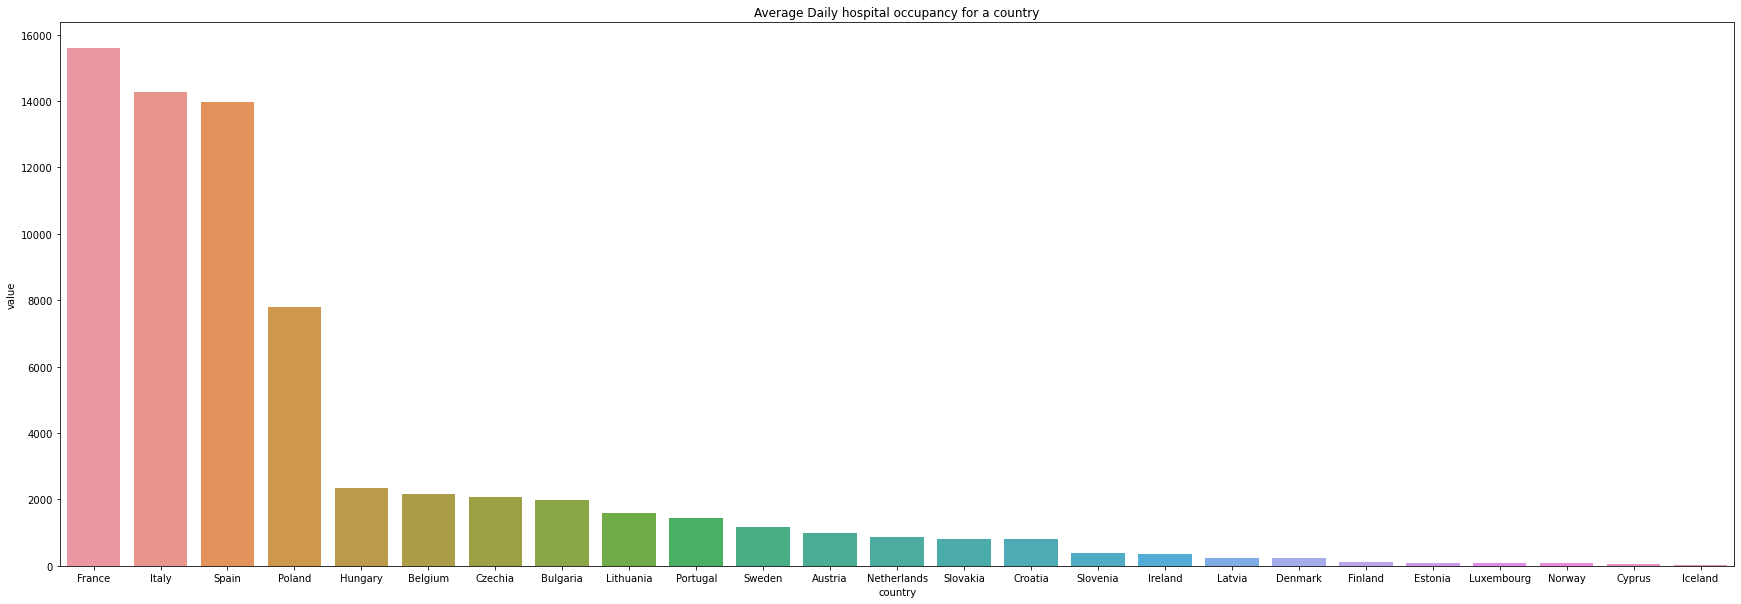

In [91]:
plt.figure(figsize=(30,10))
plt.title("Average Daily hospital occupancy for a country")
sns.barplot(x=data[data['indicator']=='Daily hospital occupancy'].groupby(['country']).mean().sort_values(by = 'value', ascending=False).index, y=data[data['indicator']=='Daily hospital occupancy'].groupby(['country']).mean().sort_values(by = 'value', ascending=False).value)



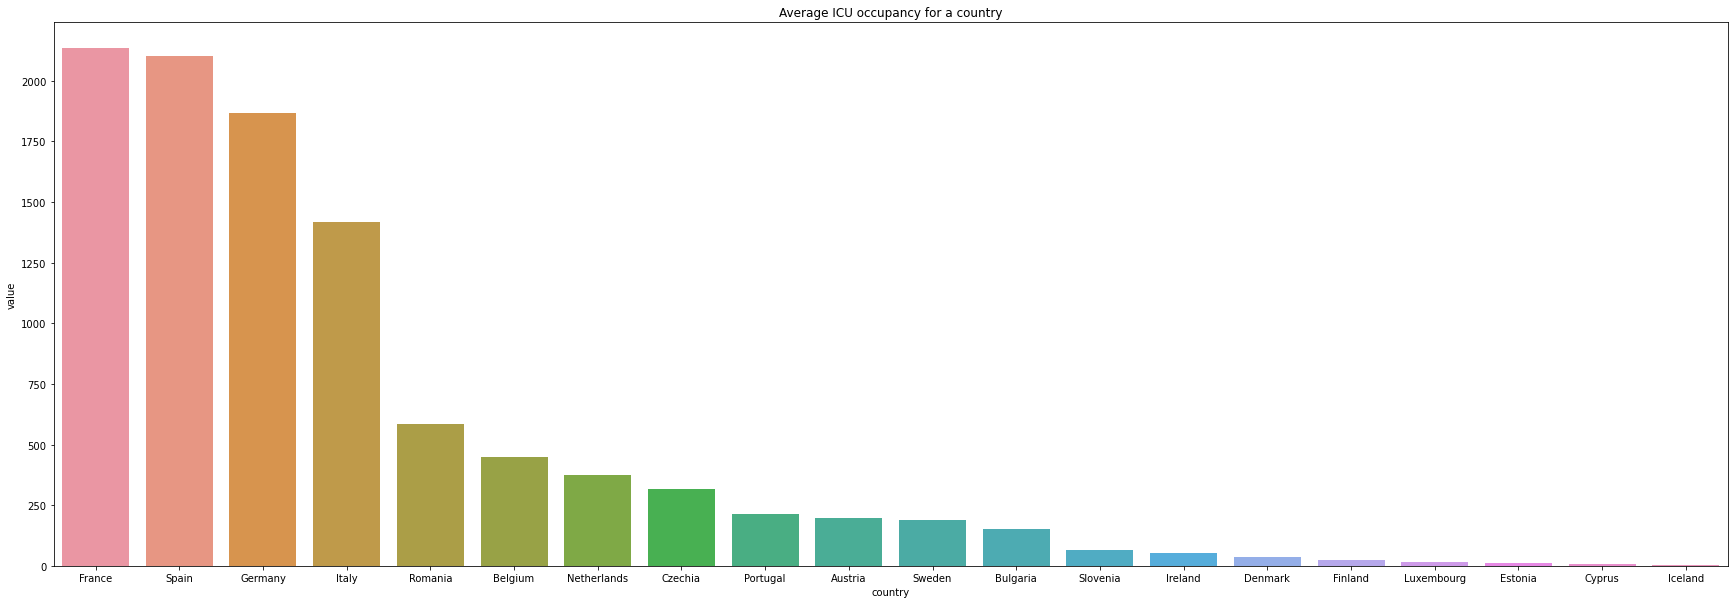

In [92]:
plt.figure(figsize=(30,10))
plt.title("Average ICU occupancy for a country")
sns.barplot(x=data[data['indicator']=='Daily ICU occupancy'].groupby(['country']).mean().sort_values(by = 'value', ascending=False).index, y=data[data['indicator']=='Daily ICU occupancy'].groupby(['country']).mean().sort_values(by = 'value', ascending=False).value)



In [93]:
plot_data = data.loc[(data.indicator == 'Daily hospital occupancy')]

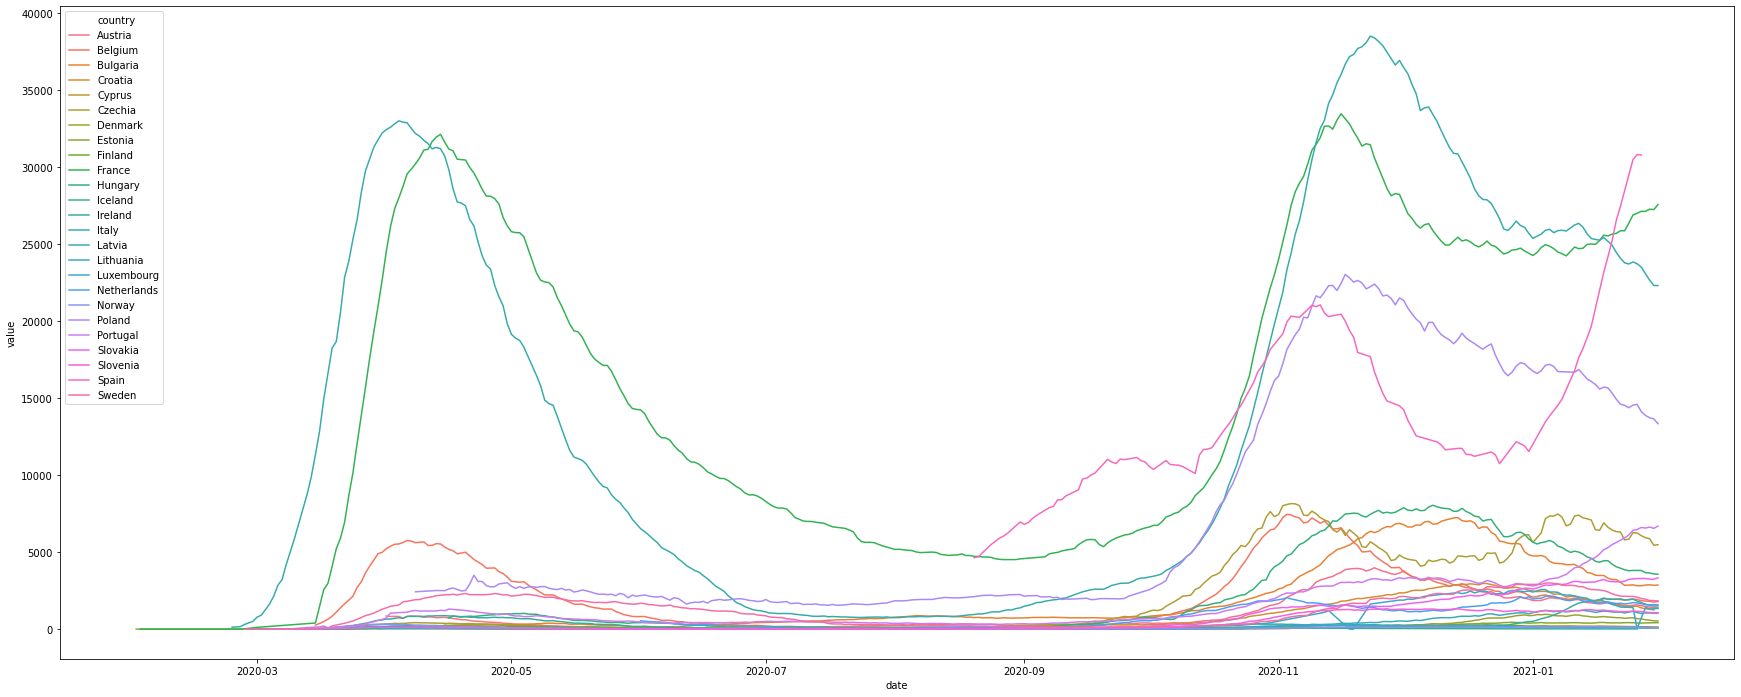

In [94]:
plt.figure(figsize = [30,12])
pl = sns.lineplot(x = 'date', y = 'value', hue = 'country', legend = 'brief', data = plot_data)

In [95]:
plot_data_icu = data.loc[(data.indicator == 'Daily ICU occupancy')]

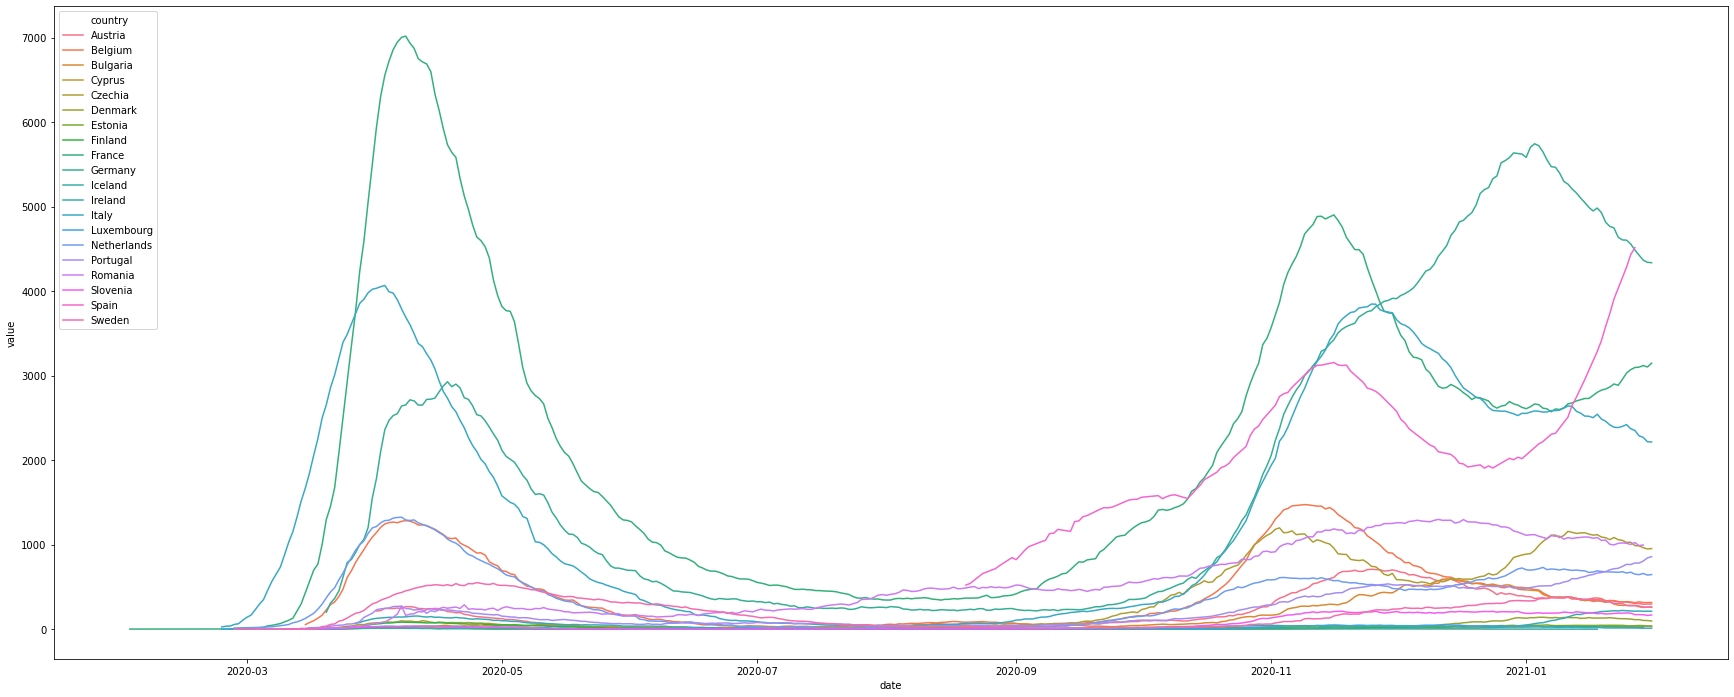

In [96]:
plt.figure(figsize = [30,12])
pl = sns.lineplot(x = 'date', y = 'value', hue = 'country', legend = 'brief', data = plot_data_icu)